In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [20]:
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.


In [40]:

df = pd.read_csv("cleaned_hr_data.csv")
print(df.Attrition)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


In [41]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


H1: Overtime → higher attrition

Question: Are employees who work overtime (Overtime = Yes) more likely to resign?

H₁: The attrition rate is higher for Overtime = Yes than for Overtime = No.

H₀: The attrition rate is independent of overtime (no difference).


Test:
Chi-Squared

In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv("cleaned_hr_data.csv")

# create Table
table = pd.crosstab(df["OverTime"], df["Attrition"])
print(table)

# Chi-Square Test
chi2_stat, p, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p)
print("estimated probs:")
print(expected)


Attrition    0    1
OverTime           
0          944  110
1          289  127
Chi-Square Statistic: 87.56429365828768
p-value: 8.15842372153832e-21
estimated probs:
[[884.06938776 169.93061224]
 [348.93061224  67.06938776]]


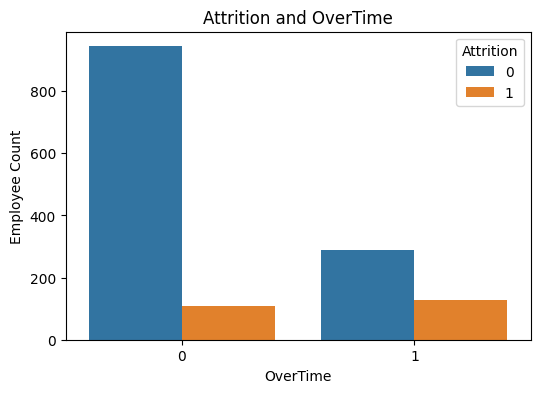

0.30528846153846156
0.10436432637571158


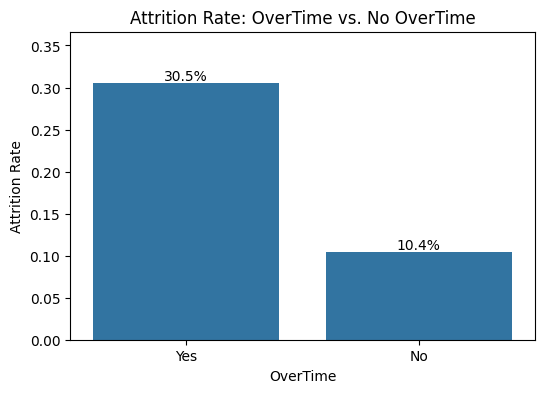

In [43]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition and OverTime")
plt.xlabel("OverTime")
plt.ylabel("Employee Count")
plt.show()


#show Attrition Rate
overtime_yes = df[df['OverTime'] == 1]
overtime_no = df[df['OverTime'] == 0]

rate_overtime_yes = len(overtime_yes[overtime_yes['Attrition'] == 1]) / len(overtime_yes)
rate_overtime_no = len(overtime_no[overtime_no['Attrition'] == 1]) / len(overtime_no)
print(rate_overtime_yes)
print(rate_overtime_no)



rates = {
    "OverTime": ["Yes", "No"],
    "AttritionRate": [rate_overtime_yes, rate_overtime_no]
}

import pandas as pd
df_rates = pd.DataFrame(rates)

plt.figure(figsize=(6,4))
ax = sns.barplot(data=df_rates, x="OverTime", y="AttritionRate")


for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom")

plt.title("Attrition Rate: OverTime vs. No OverTime")
plt.ylabel("Attrition Rate")
plt.ylim(0, max(df_rates["AttritionRate"])*1.2)
plt.show()

H2: Low professional experience (YearsAtCompany < 2) → higher attrition
Define, for example, LowExp = YearsAtCompany < 2.

H₁: Employees with YearsAtCompany < 2 have a higher attrition rate than employees with ≥ 2 years.

H₀: The attrition rate does not differ between YearsAtCompany <2 and ≥2.


Test:
Chi-squared independence test: LowExp × Attrition

In [44]:
#Seelct Employees with YearsAtCompany < 2
print(df["YearsAtCompany"].unique())
df["underTwoYears"] = (df["YearsAtCompany"] < 2).astype(int)

table = pd.crosstab(df["underTwoYears"], df['Attrition'])
print(table)

chi2_stat, p, dof, expected = chi2_contingency(table)
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p)
print("estimated probs:")
print(expected)

print(f'Attrition Rate > 2 Years: { 162 / (1093+162)}')
print(f'Attrition Rate < 2 Years: { 75 / (140+75)}')

[ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
Attrition         0    1
underTwoYears           
0              1093  162
1               140   75
Chi-Square Statistic: 63.93311463496687
p-value: 1.2871580362656326e-15
estimated probs:
[[1052.66326531  202.33673469]
 [ 180.33673469   34.66326531]]
Attrition Rate > 2 Years: 0.12908366533864543
Attrition Rate < 2 Years: 0.3488372093023256


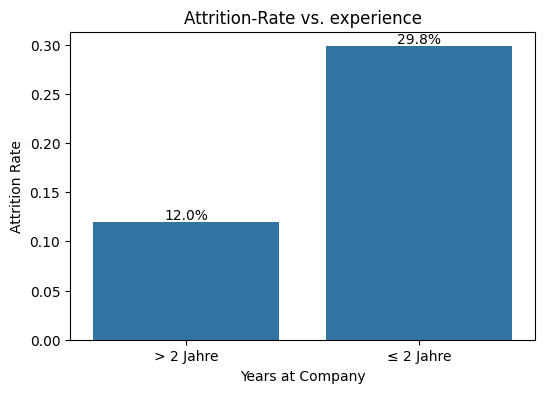

In [45]:
df['LowExperience'] = (df['YearsAtCompany'] <= 2).astype(int)
emp_over_two_years = df[df['YearsAtCompany'] > 2]

df['Attrition_bin'] = (df['Attrition'] == 1).astype(int)

rate = df.groupby('LowExperience')['Attrition_bin'].mean().reset_index()
rate['LowExperience'] = rate['LowExperience'].map({0: '> 2 Jahre', 1: '≤ 2 Jahre'})


plt.figure(figsize=(6,4))
ax = sns.barplot(data=rate, x='LowExperience', y='Attrition_bin')

# Prozentwerte anzeigen
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.title("Attrition-Rate vs. experience")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.show()



H3: „Reiseintensive Jobs (BusinessTravel = frequently) führen zu höherem Attrition.“

H1: Die Attrition-Rate ist zwischen den 3 BusinessTravel-Gruppen NICHT gleich.

H0: BusinessTravel und Attrition sind unabhängig (kein Unterschied).

chi-squared





In [12]:
BT_table = pd.crosstab(df["BusinessTravel"], df['Attrition'])
print(table)

chi2, p, dof, expected = chi2_contingency(BT_table)
print("Chi²:", chi2)
print("p-Wert:", p)

print(f"frequentely rate: {69 / (208+69)}")
print(f"rarely rate: {156 / (887+156)}")
print(f"no rate: {12 / (138+12)}")

Attrition         0    1
BusinessTravel          
frequently      208   69
no              138   12
rarely          887  156
Chi²: 24.182413685655174
p-Wert: 5.608614476449931e-06
frequentely rate: 0.2490974729241877
rarely rate: 0.14956855225311602
no rate: 0.08


CORR HEATMAP:

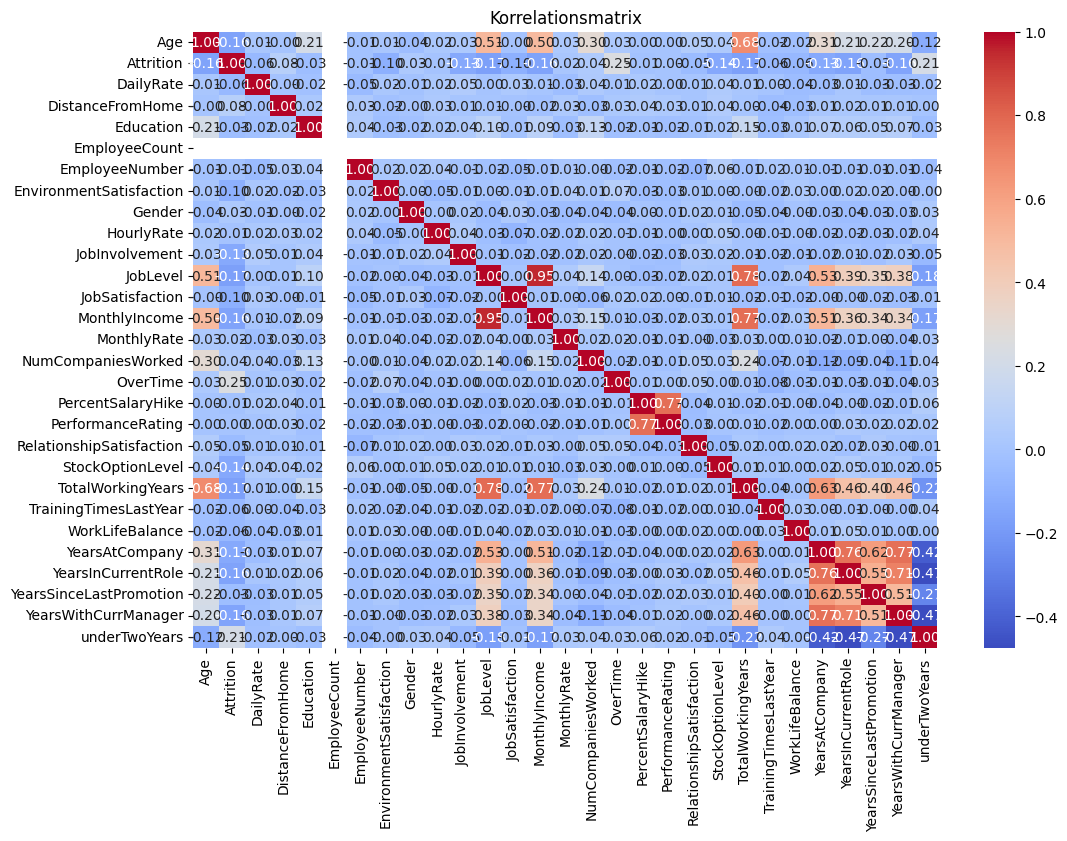

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur numerische Spalten berücksichtigen
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()